# Neural Networks

To make a neural network using Keras first you create an instance of the Sequential class, then you call add on the Sequential object to add layers. The layers are instances of the Dense class which represents a fully connected layer with a specified number of neurons.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, activation='relu',input_dim=2))
model.add(Dense(1))

2025-12-16 19:41:23.218459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765910483.237351  180758 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765910483.242916  180758 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765910483.256764  180758 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765910483.256783  180758 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765910483.256785  180758 computation_placer.cc:177] computation placer alr

When all the layers are added the next step is to compile and specify attributes such as which optimizer and loss function to use during training.

In [2]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

loss = 'mae' means that keras will use mean absolute error to measure loss

metrics = ['mae'] means that keras will capture MAE values and use it after training is complete to judge the efficacy of the training

In [3]:
#hist = model.fit(x,y, epochs=100, batch_size=100, validation_split=0.2)

The fit method returns a history object containing the training and validation metrics specified in the metrics parameter passed to the compile method, for example metrics=['mae'] captures MAE at the end of each epoch. The greater the gap between the training and validation accuracy, the greater the likelihood that the network is overfitting.

In [4]:
#prediction = mode.predict(np.array([[2,2]])

## Sizing a Neural Network

A neural network is defined by the number of layers (the depth), the number of neurons in each layer (the width of the layeres), the types of layers, and the activation functions used. When designing a network it is important that you pick the minimum width and depth which achives the accuracy required. There are a few guidelines when making this choice:
1. Greater widths and depths give the network more capacity to "learn" by fitting more tightly to the training data but also increase the risk of overfitting. The simplest way to loosen the fit is to reduce the number of neurons.
2. Generarly it is better to have greater width than greater depth to avoid the vanishing gradient problem.
3. Fewer neurons means less training time

## Using a Neural Network to Predict Taxi Fares

In [5]:
import pandas as pd

df = pd.read_csv('Data/taxi-fares.csv', parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


In [6]:
from math import sqrt

df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)

for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

/home/nb/Projects/AppliedML/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,217 (1.01 MB)

 Trainable params: 265,217 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.8647 - mae: 2.8647 - val_loss: 2.3713 - val_mae: 2.3713
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3982 - mae: 2.3982 - val_loss: 2.3724 - val_mae: 2.3724
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3958 - mae: 2.3958 - val_loss: 2.3781 - val_mae: 2.3781
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3876 - mae: 2.3876 - val_loss: 2.4129 - val_mae: 2.4129
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3804 - mae: 2.3804 - val_loss: 2.5004 - val_mae: 2.5004
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3623 - mae: 2.3623 - val_loss: 2.4584 - val_mae: 2.4584
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3554 - mae: 2.3554 - val_loss: 2.3475 - val_mae: 2.3475
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3663 - mae: 2.3663 - val_loss: 2.3602 - val_mae: 2.3602
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/

[]

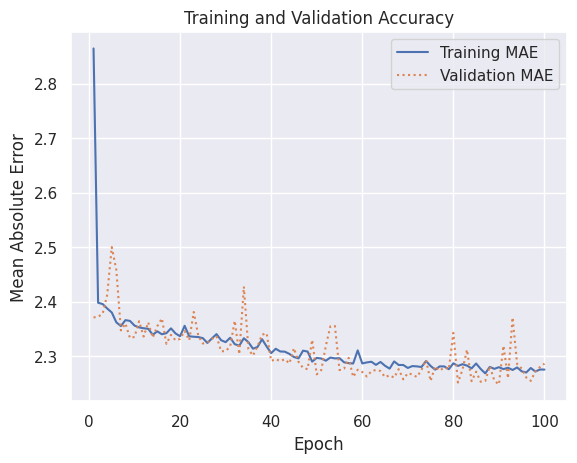

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [10]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x))

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.7530139748195636

## Binary Classification with Neural Networks

To make a neural network for binary classification there are two main changes that need to take place:
1. Adding the sigmoid activation function to the output layer. The sigmoid function produces a value from 0.0 to 1.0 representing the probability that the input belongs to the positive class.
2. Changing the loss function to binary_crossentropy which is built for binary classifiers. Also the metric has to be changed to accuracy

## Training a Neural Network to Detect Credit Card Fraud

In [15]:
df = pd.read_csv('Data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [16]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time','Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [17]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/nb/Projects/AppliedML/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9964 - loss: 0.0335 - val_accuracy: 0.9989 - val_loss: 0.0079
Epoch 2/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0078 - val_accuracy: 0.9992 - val_loss: 0.0055
Epoch 3/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0095 - val_accuracy: 0.9993 - val_loss: 0.0195
Epoch 4/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0130 - val_accuracy: 0.9993 - val_loss: 0.0052
Epoch 5/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0066 - val_accuracy: 0.9994 - val_loss: 0.0093
Epoch 6/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0086 - val_accuracy: 0.9994 - val_loss: 0.0043
Epoch 7/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0067 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 8/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0078 - 

[]

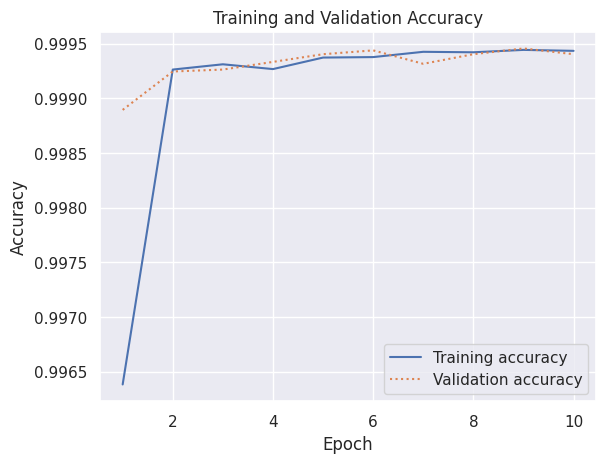

In [20]:
%matplotlib inline

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


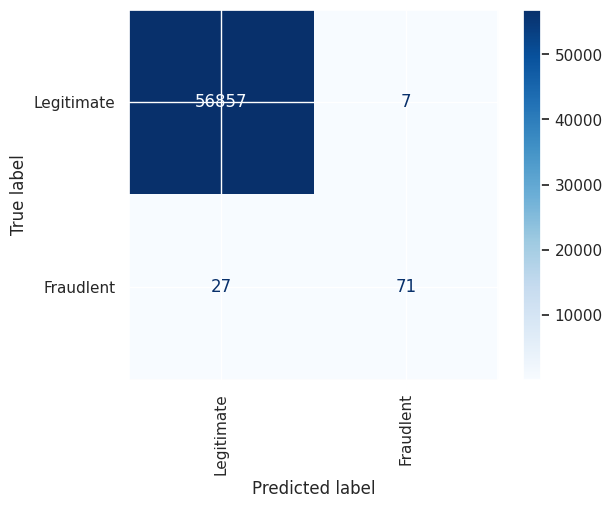

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

y_predicted = model.predict(x_test) > 0.5
labels = ['Legitimate', 'Fraudlent']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

## Multiclass Classification with Neural Networks

To make a neural network for multiclass classification there are three changes that need to take place:
1. The output layer has to contain one neuron per class.
2. The output layer has to use the softmax activation function instead of the sigmoid. Each neuron in the output layer yields a probability for the corresponding class and thanks to the softmax function the sum of all the probabilities is 1.0
3. The loss function has to be changed to sparse_categorical_crossentropy. During training this loss function exponentially penalizes errors in the probabilities predicted by a multiclass classifier, same as the binary_crossentropy for binary classifiers.

## Training a Neural Network to Recognize Faces

In [2]:
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])
image_count = faces.images.shape[0]
image_height = faces.images.shape[1]
image_width = faces.images.shape[2]
class_count = len(faces.target_names)

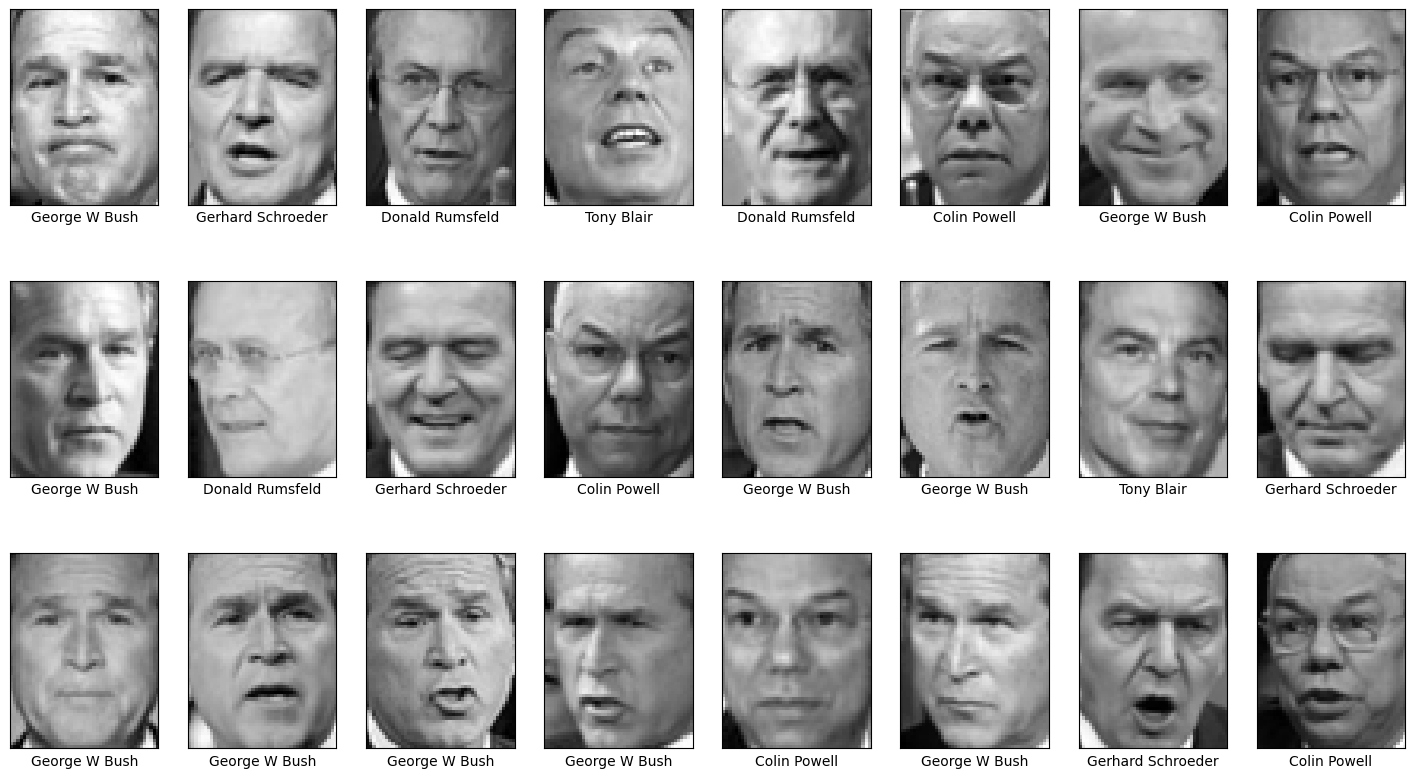

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,8,figsize=(18,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<Axes: >

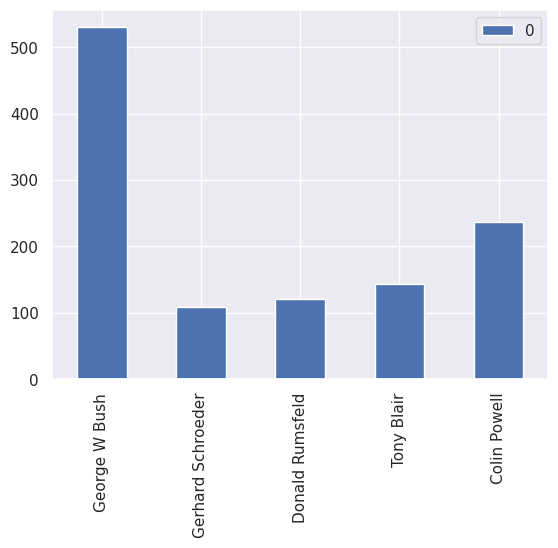

In [6]:
from collections import Counter
import seaborn as sns
sns.set()

counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [8]:
import numpy as np

mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces.shape

(500, 2914)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_faces, y_faces, train_size=0.8, stratify=y_faces, random_state=0)

In [15]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │     1,492,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,495,045 (5.70 MB)

 Trainable params: 1,495,045 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2375 - loss: 2.5963 - val_accuracy: 0.2400 - val_loss: 1.9512
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3500 - loss: 1.6186 - val_accuracy: 0.2700 - val_loss: 1.5900
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3525 - loss: 1.4640 - val_accuracy: 0.3100 - val_loss: 1.5133
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4300 - loss: 1.3955 - val_accuracy: 0.4800 - val_loss: 1.3713
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4925 - loss: 1.2980 - val_accuracy: 0.5100 - val_loss: 1.2491
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5975 - loss: 1.1703 - val_accuracy: 0.5800 - val_loss: 1.2248
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6225 - loss: 1.0900 - val_accuracy: 0.5700 - val_loss: 1.1424
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6175 - loss: 1.0592 - val_accuracy: 0.

[]

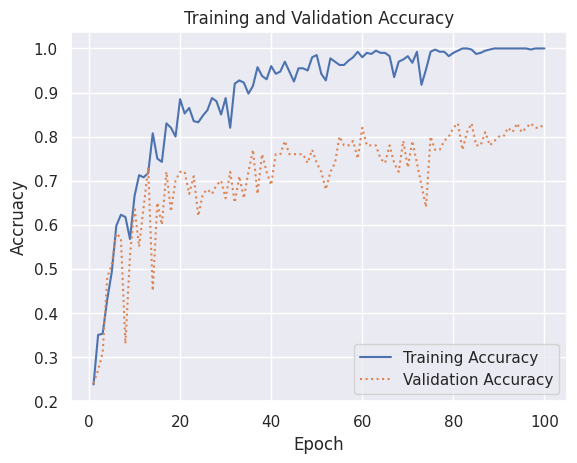

In [17]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accruacy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


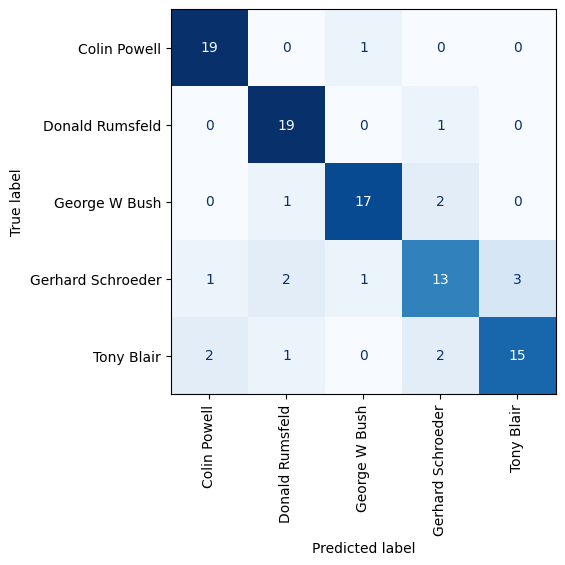

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_pred = model.predict(x_test)
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cmd.from_predictions(y_test, y_pred.argmax(axis=1), display_labels=faces.target_names, colorbar=False, cmap='Blues', xticks_rotation='vertical', ax=ax)

## Dropot

Dropout is one way to prevent overfitting. It randomly drops connections between layeres during training to prevent the network from learning the training data too well.

In [19]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(521, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dropout(0.2))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/home/nb/Projects/AppliedML/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.2150 - loss: 2.8715 - val_accuracy: 0.2000 - val_loss: 1.6002
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2875 - loss: 1.6848 - val_accuracy: 0.2600 - val_loss: 1.6999
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2875 - loss: 1.6034 - val_accuracy: 0.3700 - val_loss: 1.5612
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3400 - loss: 1.4769 - val_accuracy: 0.4200 - val_loss: 1.4866
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4025 - loss: 1.4702 - val_accuracy: 0.3900 - val_loss: 1.4609
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3600 - loss: 1.4687 - val_accuracy: 0.4700 - val_loss: 1.4154
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4350 - loss: 1.4089 - val_accuracy: 0.3200 - val_loss: 1.4164
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3975 - loss: 1.4018 - val_accuracy: 0.

[]

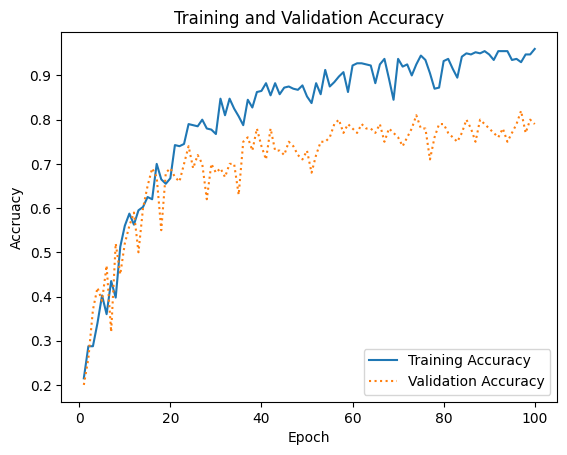

In [21]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accruacy')
plt.legend(loc='lower right')
plt.plot()